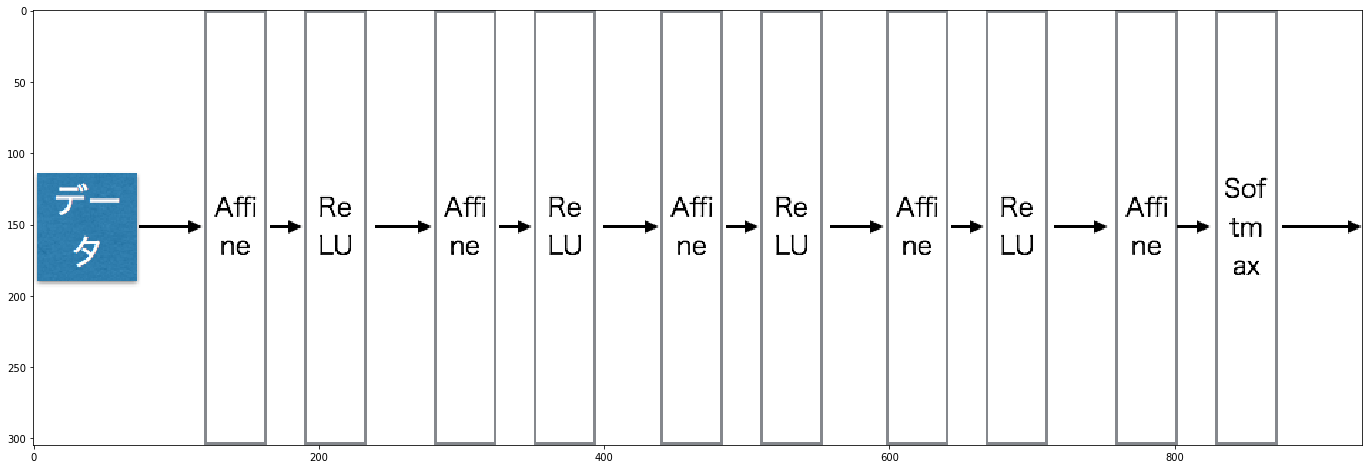

In [3]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

img = imread('D:/python/deeplearning/pycontent/dataset/ConvolutionNeuralNetwork001.png')
plt.figure(figsize=(50, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

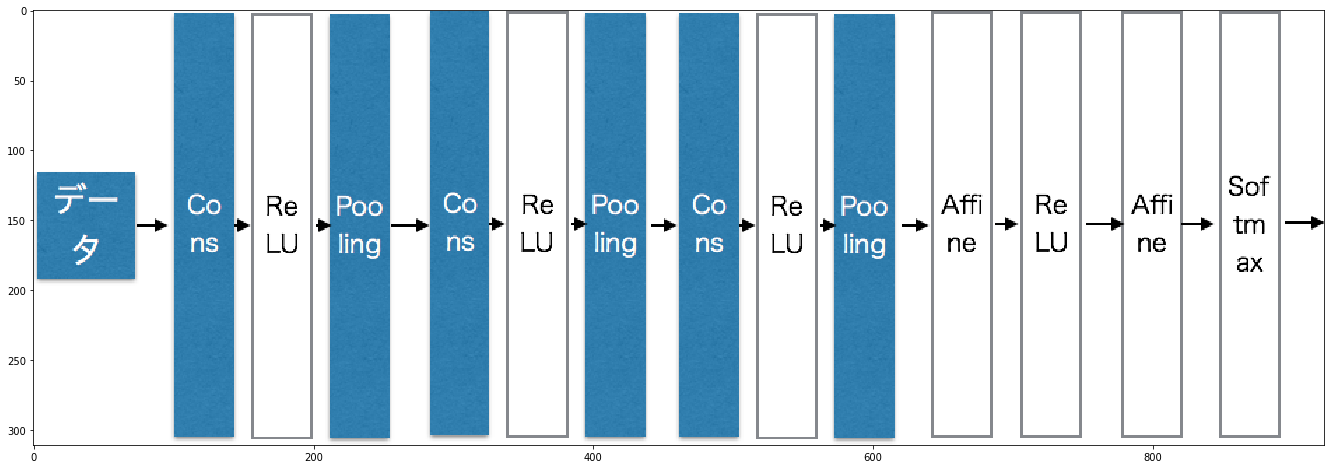

In [4]:
img = imread('D:/python/deeplearning/pycontent/dataset/ConvolutionNeuralNetwork002.png')
plt.figure(figsize=(50, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

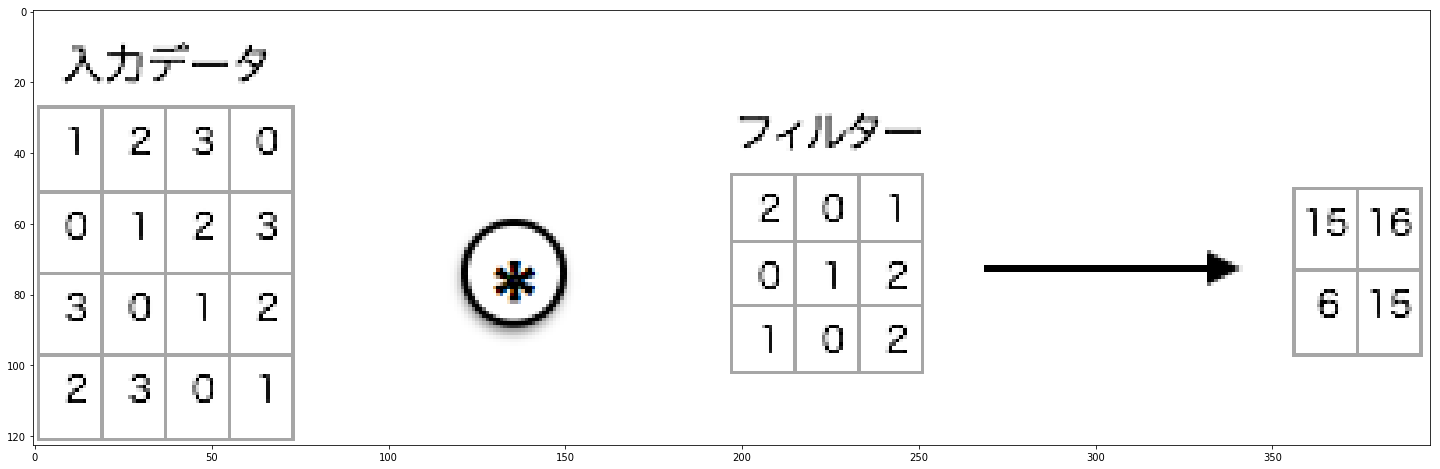

In [5]:
img = imread('D:/python/deeplearning/pycontent/dataset/ConvolutionNeuralNetwork003.png')
plt.figure(figsize=(50, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

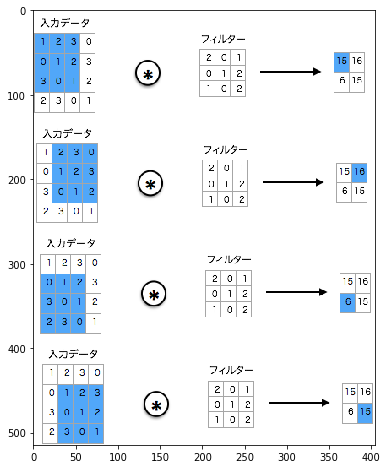

In [6]:
img = imread('D:/python/deeplearning/pycontent/dataset/ConvolutionNeuralNetwork004.png')
plt.figure(figsize=(50, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

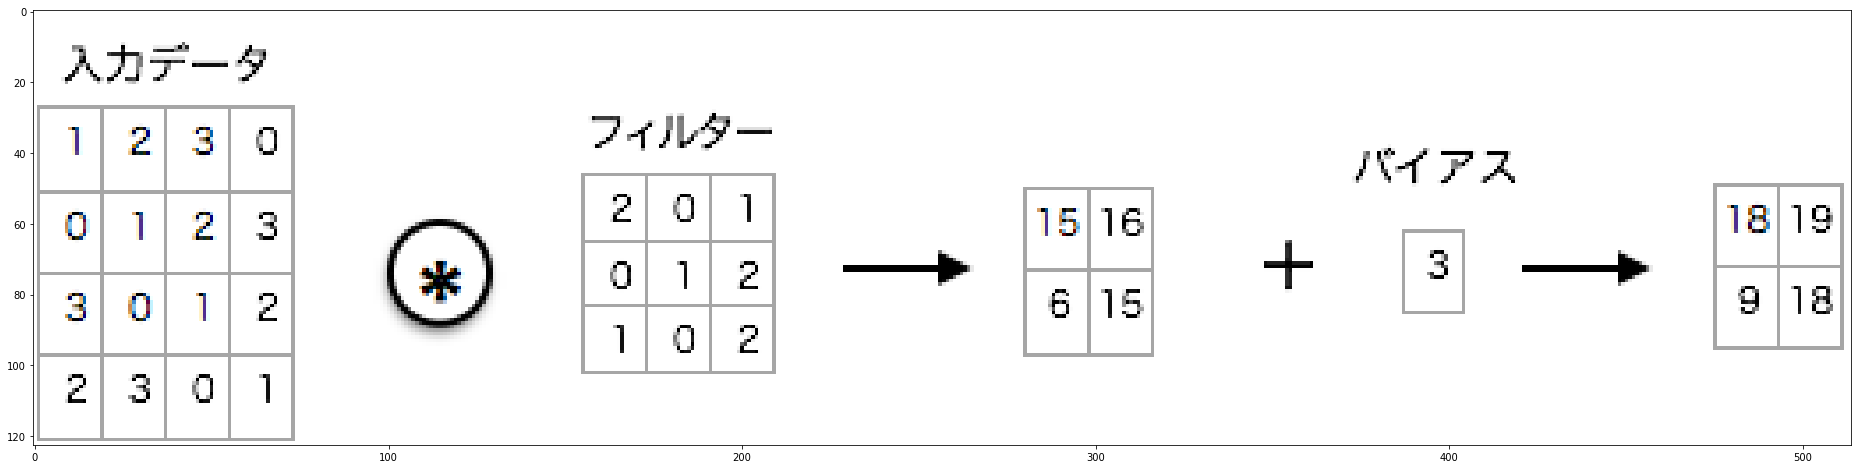

In [7]:
img = imread('D:/python/deeplearning/pycontent/dataset/ConvolutionNeuralNetwork005.png')
plt.figure(figsize=(50, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

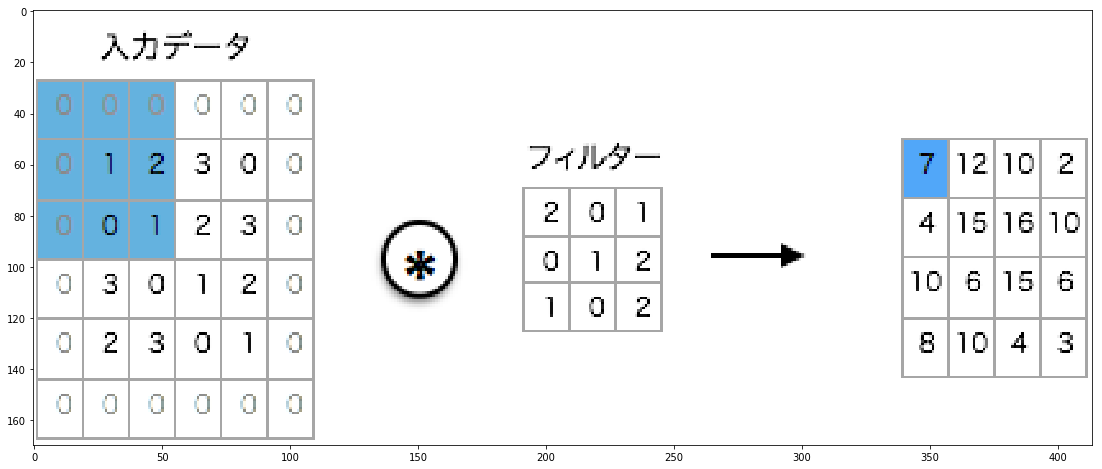

In [8]:
img = imread('D:/python/deeplearning/pycontent/dataset/ConvolutionNeuralNetwork006.png')
plt.figure(figsize=(50, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

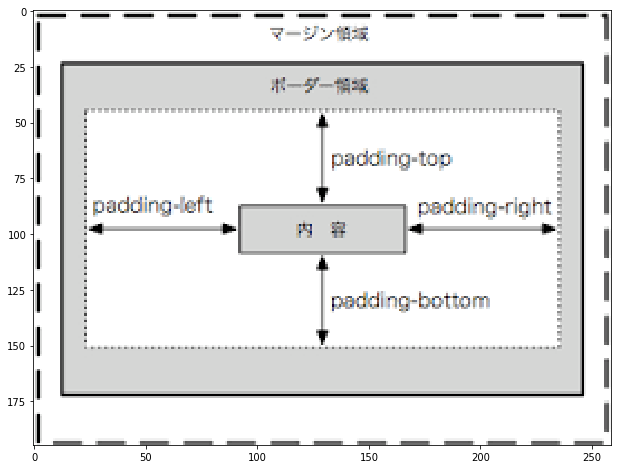

In [9]:
img = imread('D:/python/deeplearning/pycontent/dataset/ConvolutionNeuralNetwork007.png')
plt.figure(figsize=(50, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

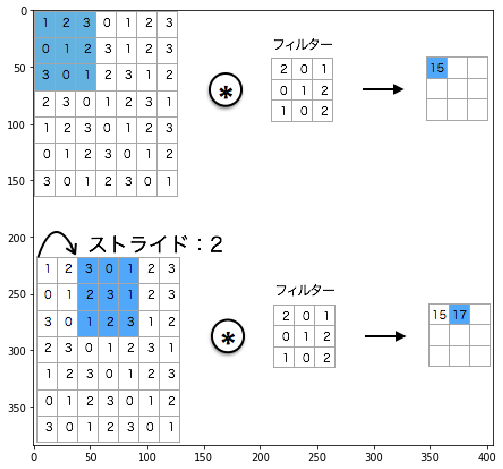

In [10]:
img = imread('D:/python/deeplearning/pycontent/dataset/ConvolutionNeuralNetwork008.png')
plt.figure(figsize=(50, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

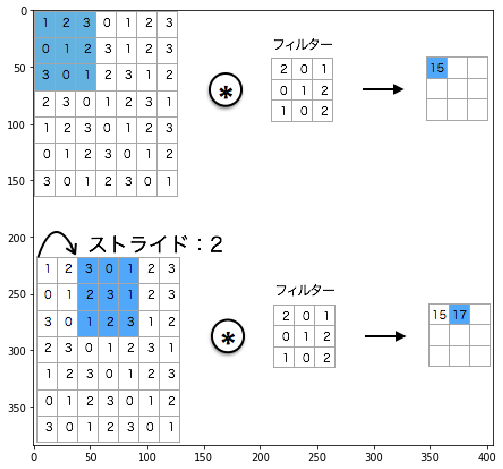

In [11]:
img = imread('D:/python/deeplearning/pycontent/dataset/ConvolutionNeuralNetwork009.png')
plt.figure(figsize=(50, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

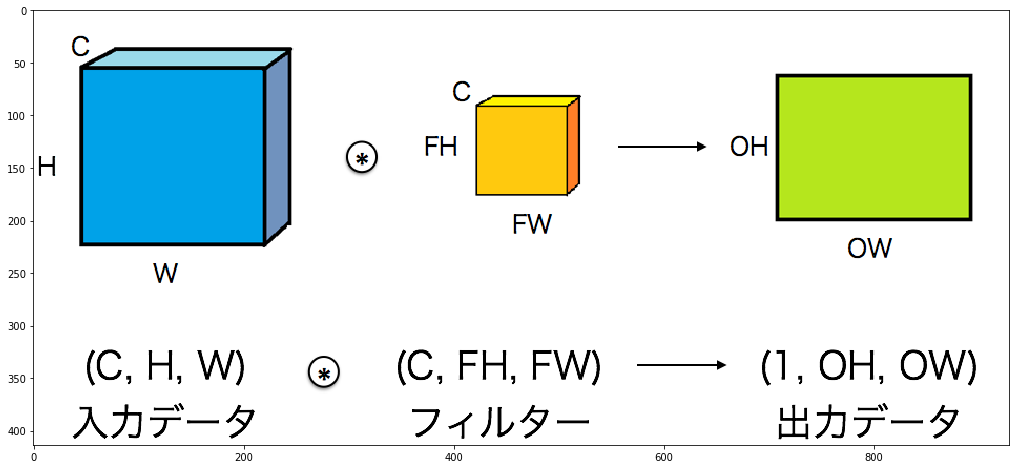

In [12]:
img = imread('D:/python/deeplearning/pycontent/dataset/ConvolutionNeuralNetwork010.png')
plt.figure(figsize=(50, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

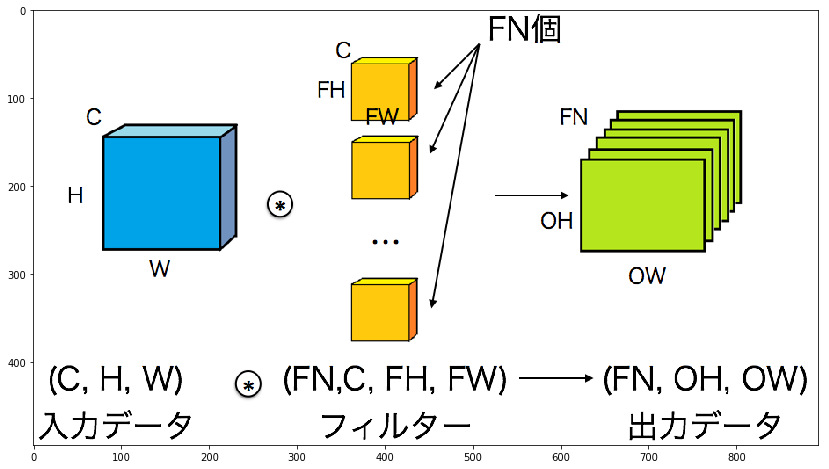

In [13]:
img = imread('D:/python/deeplearning/pycontent/dataset/ConvolutionNeuralNetwork011.png')
plt.figure(figsize=(50, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

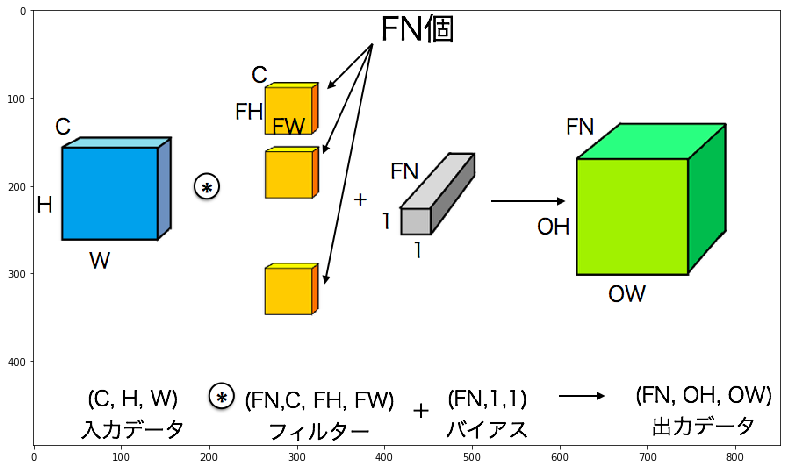

In [15]:
img = imread('D:/python/deeplearning/pycontent/dataset/ConvolutionNeuralNetwork012.png')
plt.figure(figsize=(50, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

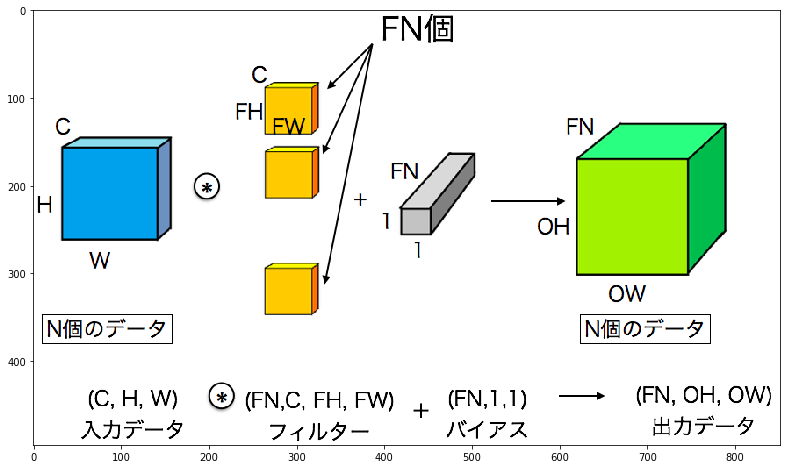

In [16]:
img = imread('D:/python/deeplearning/pycontent/dataset/ConvolutionNeuralNetwork013.png')
plt.figure(figsize=(50, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

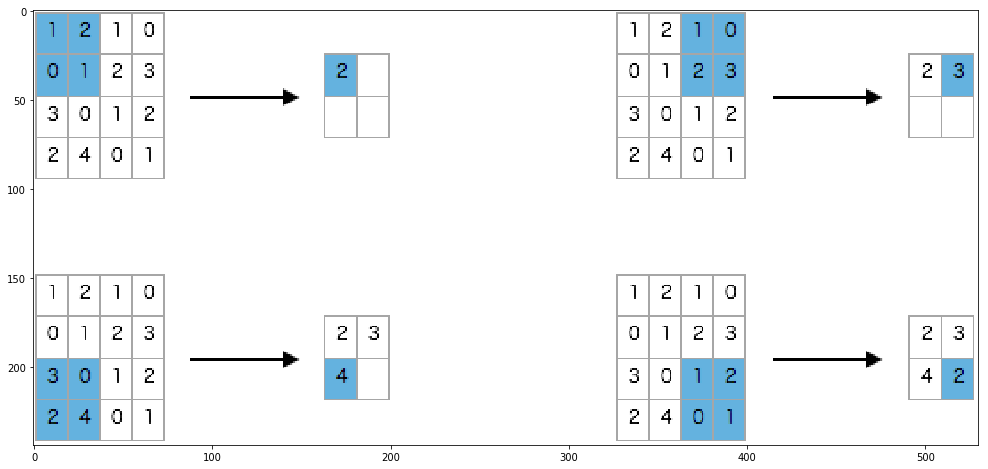

In [17]:
img = imread('D:/python/deeplearning/pycontent/dataset/ConvolutionNeuralNetwork014.png')
plt.figure(figsize=(50, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

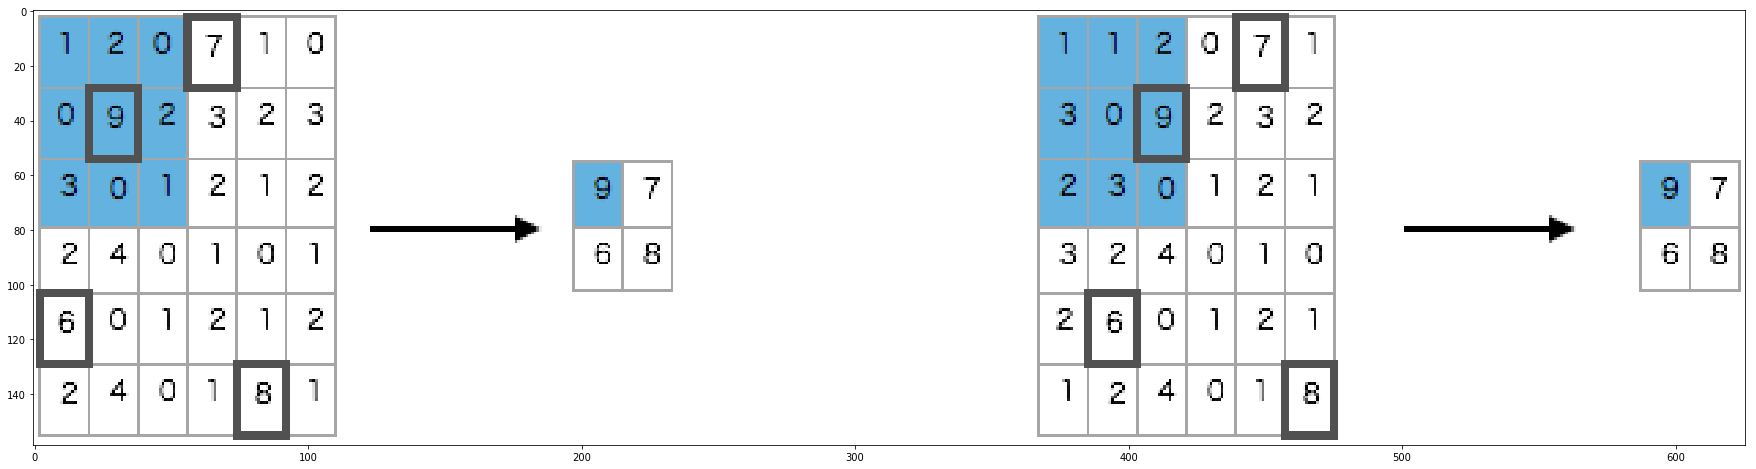

In [18]:
img = imread('D:/python/deeplearning/pycontent/dataset/ConvolutionNeuralNetwork015.png')
plt.figure(figsize=(50, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

In [1]:
#全結合層。これまでのニューラルネットワークは全部結合していた。Dropoutは？ってつっこみはさておき。
#今回行うのはCNN。畳み込みニューラルネットワーク。
#前回は立体を一面に落としていた。え？写真でしょ？って思うだろうけれど、実質（1,28,28）の画像を784という数字に直した。

#通常考えれば何でも立体であるわけでして、そこに特徴があるわけじゃん。
#で、その大きいスコアを取り出そうってのが大まかな考えなわけだし。
#で、Convolutionは何を行うのかというと、例えばさっきの28ｘ28ならそれが用意され、そこの特徴点を
#フィルターを通して計算される。そこにバイアスを足して出力データとして、ReLU関数層に移動する。

#全結合層と違ってこっちは割かしラフで入力データの周囲に0でパディング（詰める）する。
#これは都合だ。出力が1になってしまった時、もう次の計算が出来ないから。
#フィルターは上記のように計算したら次の位置に移動する。これをstride(歩)という。

#3次元データなんだから縦横奥の3方向あるわけでして。
#で、それをずらして計算するという感じっぽい。
#イメージ付きにくいし、ブロックって言われてもだし、輪切りみたいなものだと思う。

#ぷーリング層では何をするのかというと、大きい数字を抜き出す。それだけ。今回はそれを繰り返す。

#なので、74から畳み込みニューラルネットワークに入っていくのだけれど、とりあえず、全結合層の問題点として
#立体図を無理やり数字にしてしまうものだから特徴点を見逃してしまっている可能性もあるよねって事。

In [2]:
import numpy as np

x = np.random.rand(10,1,28,28)
x.shape


(10, 1, 28, 28)

In [3]:
x[0].shape
x[1].shape

(1, 28, 28)

In [4]:
x[0,0]

array([[9.66955294e-02, 7.83548336e-01, 4.43999022e-01, 5.84194072e-01,
        4.23141451e-01, 2.19383921e-01, 5.89080763e-01, 6.92775460e-01,
        9.72439108e-01, 7.41845932e-01, 3.47459712e-01, 7.93480866e-01,
        5.87068426e-01, 9.37611525e-01, 1.65746405e-01, 3.93737694e-01,
        4.13605427e-01, 9.30670016e-01, 2.89849742e-02, 3.72412834e-01,
        7.97896215e-01, 9.40128517e-01, 2.28249257e-01, 7.13627386e-01,
        9.95222521e-01, 4.29058160e-01, 1.06633136e-01, 6.72824197e-01],
       [6.14767578e-01, 4.43429309e-01, 3.40390196e-01, 4.78438808e-01,
        3.13652411e-01, 2.39333828e-01, 2.50947824e-01, 7.93596007e-01,
        2.18740448e-01, 1.88057765e-01, 4.12553292e-01, 5.50703926e-02,
        4.36652909e-01, 6.24261025e-01, 3.95980650e-01, 9.34279776e-01,
        6.23291439e-01, 6.06932328e-02, 1.06066685e-01, 6.21720469e-01,
        3.64895264e-01, 9.64606738e-01, 4.73053679e-01, 5.83527784e-01,
        8.41748781e-01, 6.55845056e-01, 7.16284743e-01, 7.13969

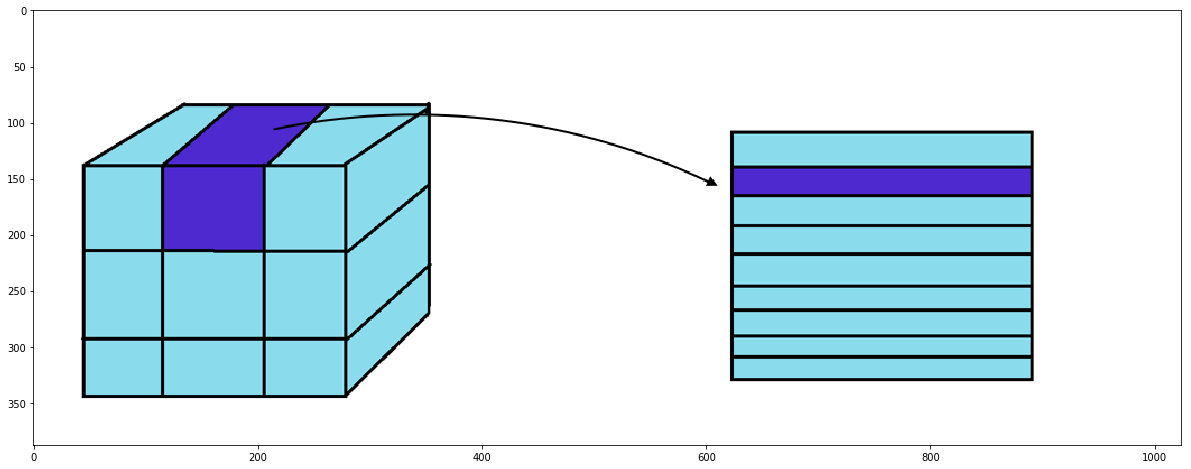

In [5]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

img = imread('D:/python/deeplearning/pycontent/dataset/ConvolutionNeuralNetwork016.png')
plt.figure(figsize=(50, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

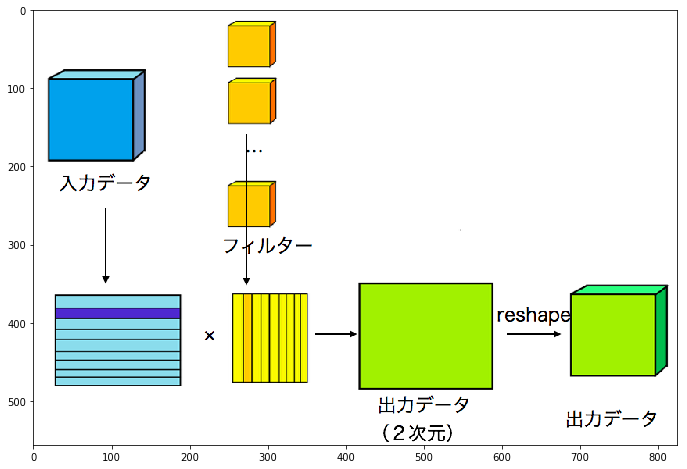

In [6]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

img = imread('D:/python/deeplearning/pycontent/dataset/ConvolutionNeuralNetwork017.png')
plt.figure(figsize=(50, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

In [7]:
#----------------------------------------------------
# Parameters
#   input_data : (データ数,チャンネル,高さ,横幅)の4次元配列からなる入力データ
#   filter_h   : フィルターの高さ
#   filter_w   : フィルターの横幅
#   stride     : ストライド（歩）
#   pad        : パディング(詰める)
#   Returns
#   col        : 2次元配列 
#----------------------------------------------------
def im2col(input_data, filter_h, filter_w, stride=1, pad=0):

    N, C, H, W = input_data.shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1

    img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

    col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N*out_h*out_w, -1)
    return col

In [8]:
import sys, os
sys.path.append(os.pardir)
from common.util import im2col

x1 = np.random.rand(1, 3, 7, 7)
col1 = im2col(x1, 5, 5, stride=1, pad=0)
print(col1.shape)

x2 = np.random.rand(10, 3, 7, 7)
col2 = im2col(x2, 5, 5, stride=1, pad=0)
print(col2.shape)

(9, 75)
(90, 75)


In [9]:
#(9, 75) →　x1の結果：バッチサイズ:1 channel:3 7x7
#(90, 75)→　x2の結果  バッチサイズ:10 channel:3 7x7
#

In [10]:
class Convolution:
    def __init__(self, W, b, stride=1, pad=0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad

        # 中間データ（backward時に使用）
        self.x = None   
        self.col = None
        self.col_W = None

        # 重み・バイアスパラメータの勾配
        self.dW = None
        self.db = None

    def forward(self, x):
        FN, C, FH, FW = self.W.shape
        N, C, H, W = x.shape
        out_h = 1 + int((H + 2*self.pad - FH) / self.stride)
        out_w = 1 + int((W + 2*self.pad - FW) / self.stride)

        col = im2col(x, FH, FW, self.stride, self.pad)
        #reshape関数に-1を指定すると、多次元配列の辻褄が合うように要素数をまとめてくれる
        col_W = self.W.reshape(FN, -1).T

        out = np.dot(col, col_W) + self.b
        #最後に出力サイズを適切な形状に整形する
        # reshapeは出力サイズを指定の形状を再構成
        # transposeは軸の順番を入れ替えている(transporse：転置)
        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)

        self.x = x
        self.col = col
        self.col_W = col_W

        return out

    def backward(self, dout):
        FN, C, FH, FW = self.W.shape
        dout = dout.transpose(0,2,3,1).reshape(-1, FN)

        # 逆行列の計算自体は次の２行でしており、Affineの時と同じ、違うのは行列の次元の辻褄あわせだけ
        self.db = np.sum(dout, axis=0)
        self.dW = np.dot(self.col.T, dout)

        self.dW = self.dW.transpose(1, 0).reshape(FN, C, FH, FW)

        dcol = np.dot(dout, self.col_W.T)
        #im2colと逆の処理
        dx = col2im(dcol, self.x.shape, FH, FW, self.stride, self.pad)

        return dx

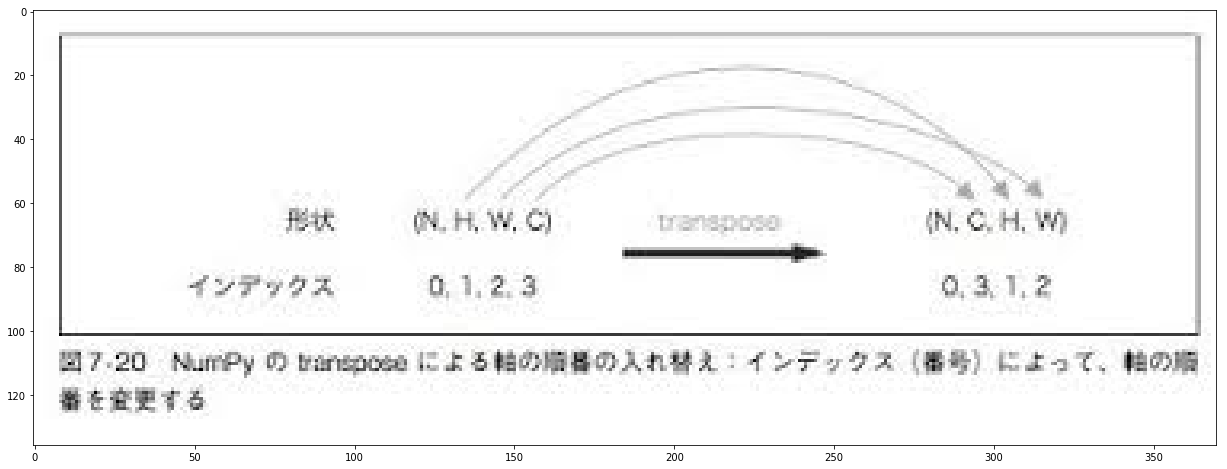

In [12]:
img = imread('D:/python/deeplearning/pycontent/dataset/ConvolutionNeuralNetwork018.jpg')
plt.figure(figsize=(50, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()